In [2]:
import pandas, scipy, numpy, seaborn
import matplotlib, matplotlib.pyplot as plt
import swan_vis as swan

In [15]:
file_directory = "/Users/kja11/OneDrive - Menntaský (1)/PostDoc_Hypothermia/in_silico/Python/"
path_exemple = "1) input/RNAseq/data_example/data/"
path = "1) input/RNAseq/"

# Data download

In [8]:
# Read the GTF file
hek_gtf = file_directory + path + 'mytranscripts.gtf'
hek_gtx_df = pandas.read_csv(hek_gtf, sep='\t', comment='#', header=None)

# Optionally, you can specify the column names for better readability
hek_gtx_df.columns = ['seqname', 'source', 'feature', 'start', 'end',
    'score', 'strand', 'frame', 'attribute']

# Display the first few rows of the DataFrame
print(hek_gtx_df.head())

C:\Users\kja11\AppData\Local\Temp\ipykernel_1684\860551786.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  hek_gtx_df = pandas.read_csv(hek_gtf, sep='\t', comment='#', header=None)


  seqname  source      feature    start      end score strand frame  \
0       1  havana   transcript  3069168  3434342     .      +     .   
1       1  havana         exon  3069168  3069296     .      +     .   
2       1  havana          CDS  3069260  3069296     .      +     0   
3       1  havana  start_codon  3069260  3069262     .      +     0   
4       1  havana         exon  3186125  3186474     .      +     .   

                                           attribute  
0  gene_id "ENSG00000142611"; gene_version "17"; ...  
1  gene_id "ENSG00000142611"; gene_version "17"; ...  
2  gene_id "ENSG00000142611"; gene_version "17"; ...  
3  gene_id "ENSG00000142611"; gene_version "17"; ...  
4  gene_id "ENSG00000142611"; gene_version "17"; ...  


In [17]:
# Read the GTF file
exp_gtf = file_directory + path_exemple + 'all_talon_observedOnly.gtf'
exp_gtf_df = pandas.read_csv(exp_gtf, sep='\t', comment='#', header=None)

# Optionally, you can specify the column names for better readability
exp_gtf_df.columns = ['seqname', 'source', 'feature', 'start', 'end',
    'score', 'strand', 'frame', 'attribute']

# Display the first few rows of the DataFrame
print(exp_gtf_df.head())

  seqname  source     feature   start     end score strand frame  \
0    chr1  HAVANA        gene  184876  195411     .      -     .   
1    chr1   TALON  transcript  184876  199860     .      -     .   
2    chr1   TALON        exon  199837  199860     .      -     .   
3    chr1   TALON        exon  195263  195416     .      -     .   
4    chr1  HAVANA        exon  188791  188902     .      -     .   

                                           attribute  
0  gene_id "ENSG00000279457.4"; gene_name "FO5387...  
1  gene_id "ENSG00000279457.4"; transcript_id "TA...  
2  gene_id "ENSG00000279457.4"; transcript_id "TA...  
3  gene_id "ENSG00000279457.4"; transcript_id "TA...  
4  gene_id "ENSG00000279457.4"; transcript_id "TA...  


# Methods

In [9]:
%%time
# initialize a new empty SwanGraph
sg = swan.SwanGraph() 

CPU times: total: 15.6 ms
Wall time: 13.5 ms


In [22]:
%%time
# add a dataset's transcriptome to the SwanGraph EXEMPLE
sg.add_transcriptome(exp_gtf)


Adding transcriptome to the SwanGraph
CPU times: total: 38.7 s
Wall time: 1min 34s


In [25]:
swan.validate_gtf(hek_gtf)

In [21]:
%%time
# add a dataset's transcriptome to the SwanGraph
sg.add_transcriptome(hek_gtf)


Adding transcriptome to the SwanGraph


ValueError: too many values to unpack (expected 2)

In [57]:
%%time
# add an annotation transcriptome to the graph
sg.add_annotation(annot_gtf)


Adding annotation to the SwanGraph
CPU times: total: 2min 39s
Wall time: 6min 41s


In [81]:
%%time
# add metadata
sg.add_metadata(meta)
sg.adata.obs

KeyError: 'dataset'

In [62]:
%%time
# add each dataset's abundance information to the SwanGraph
sg.add_abundance(ab_file)

C:\Users\kja11\anaconda3\Lib\site-packages\swan_vis\swangraph.py:366: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers['counts'] = adata.X



Adding abundance for datasets hepg2_1, hepg2_2, hffc6_1, hffc6_2, hffc6_3 to SwanGraph.
Calculating TPM...
Calculating PI...
Calculating edge usage...


C:\Users\kja11\anaconda3\Lib\site-packages\anndata\_core\anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Calculating TSS usage...
Calculating TES usage...
CPU times: total: 17 s
Wall time: 34.4 s


## Saving and loading your SwanGraph
Following this, you can save your SwanGraph so you can easily work with it again without re-adding all the data.

In [65]:
# # save the SwanGraph as a Python pickle file
# sg.save_graph(file_directory + path + 'swan_tutorial')

Saving graph as /Users/kja11/OneDrive - Menntaský (1)/PostDoc_Hypothermia/in_silico/Python/1) input/RNAseq/data_example/data/swan_tutorial.p


In [ ]:
# load up a saved SwanGraph from a pickle file
sg = swan.read(file_directory + path + 'swan_tutorial')

## Visualization

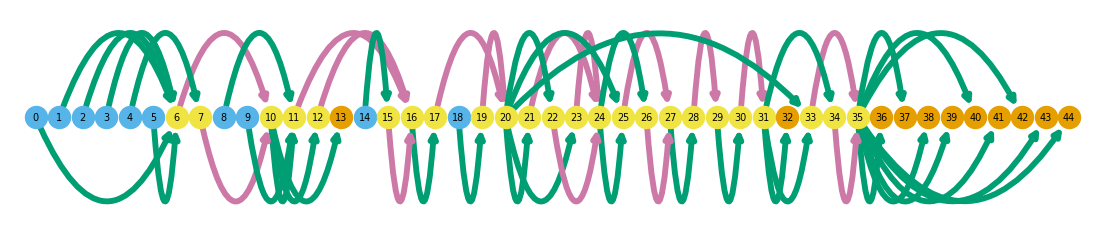

In [67]:
# see plot of a specific gene
sg.plot_graph('GAPDH')

In [88]:
# Save all isoform information for gene ADRM1 as .pdf
sg.gen_report('ADRM1',
              prefix=file_directory + path + 'adrm1_tutorial')

ValueError: Cannot embed the 'pdf' image format

In [83]:
#see the metadata from the sg
sg.adata.obs

,level_0,index,dataset_back,total_counts,cell_line,replicate,description
0,0,hepg2_1,hepg2_1,499647,hepg2,1,liver
1,1,hepg2_2,hepg2_2,848447,hepg2,2,liver
2,2,hffc6_1,hffc6_1,761493,hffc6,1,fibroblast
3,3,hffc6_2,hffc6_2,787967,hffc6,2,fibroblast
4,4,hffc6_3,hffc6_3,614921,hffc6,3,fibroblast


In [89]:
# find genes that exhibit DIE between HFFc6 and HepG2
obs_col = 'cell_line'
obs_conditions = ['hepg2', 'hffc6']
die_table, die_results = sg.die_gene_test(obs_col=obs_col,
                                          obs_conditions=obs_conditions,
                                          verbose=True)

Testing for DIE for each gene:   8%|███▌                                          | 1148/14684 [00:13<02:32, 88.73it/s]C:\Users\kja11\anaconda3\Lib\site-packages\swan_vis\utils.py:993: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  chi_table = gene_df[counts_cols].to_numpy()
Testing for DIE for each gene:   9%|████▎                                         | 1382/14684 [00:15<02:21, 93.83it/s]C:\Users\kja11\anaconda3\Lib\site-packages\swan_vis\utils.py:993: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  chi_table = gene_df[counts_cols].to_numpy()
C:\Users\kja11\anaconda3\Lib\site-packages\swan_vis\util

Testing for DIE for each gene:  42%|███████████████████▏                          | 6116/14684 [01:08<01:32, 93.13it/s]C:\Users\kja11\anaconda3\Lib\site-packages\swan_vis\utils.py:993: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  chi_table = gene_df[counts_cols].to_numpy()
Testing for DIE for each gene:  43%|███████████████████▉                          | 6359/14684 [01:10<01:26, 95.84it/s]C:\Users\kja11\anaconda3\Lib\site-packages\swan_vis\utils.py:993: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  chi_table = gene_df[counts_cols].to_numpy()
Testing for DIE for each gene:  44%|████████████████████

Testing for DIE for each gene:  76%|██████████████████████████████████           | 11135/14684 [02:07<00:42, 82.66it/s]C:\Users\kja11\anaconda3\Lib\site-packages\swan_vis\utils.py:993: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  chi_table = gene_df[counts_cols].to_numpy()
Testing for DIE for each gene:  76%|██████████████████████████████████▎          | 11197/14684 [02:08<00:47, 73.41it/s]C:\Users\kja11\anaconda3\Lib\site-packages\swan_vis\utils.py:993: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  chi_table = gene_df[counts_cols].to_numpy()
Testing for DIE for each gene:  79%|████████████████████

In [35]:
# Read the GTF file
annot_df = pandas.read_csv(annot_gtf, sep='\t', comment='#', header=None)

# Optionally, you can specify the column names for better readability
annot_df.columns = [
    'seqname', 'source', 'feature', 'start', 'end',
    'score', 'strand', 'frame', 'attribute'
]

# Display the first few rows of the DataFrame
print(annot_df.head())

  seqname  source     feature  start    end score strand frame  \
0    chr1  HAVANA        gene  11869  14409     .      +     .   
1    chr1  HAVANA  transcript  11869  14409     .      +     .   
2    chr1  HAVANA        exon  11869  12227     .      +     .   
3    chr1  HAVANA        exon  12613  12721     .      +     .   
4    chr1  HAVANA        exon  13221  14409     .      +     .   

                                           attribute  
0  gene_id "ENSG00000223972.5"; gene_type "transc...  
1  gene_id "ENSG00000223972.5"; transcript_id "EN...  
2  gene_id "ENSG00000223972.5"; transcript_id "EN...  
3  gene_id "ENSG00000223972.5"; transcript_id "EN...  
4  gene_id "ENSG00000223972.5"; transcript_id "EN...  


In [36]:
# Display the first few rows of the DataFrame
print(gtf_df.head())

C:\Users\kja11\AppData\Local\Temp\ipykernel_25240\4178251031.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gtf_df = pandas.read_csv(gtf_transcripts, sep='\t', comment='#', header=None)


  seqname  source      feature    start      end score strand frame  \
0       1  havana   transcript  3069168  3434342     .      +     .   
1       1  havana         exon  3069168  3069296     .      +     .   
2       1  havana          CDS  3069260  3069296     .      +     0   
3       1  havana  start_codon  3069260  3069262     .      +     0   
4       1  havana         exon  3186125  3186474     .      +     .   

                                           attribute  
0  gene_id "ENSG00000142611"; gene_version "17"; ...  
1  gene_id "ENSG00000142611"; gene_version "17"; ...  
2  gene_id "ENSG00000142611"; gene_version "17"; ...  
3  gene_id "ENSG00000142611"; gene_version "17"; ...  
4  gene_id "ENSG00000142611"; gene_version "17"; ...  


In [75]:
%%time
es_genes, es_transcripts = sg.find_es_genes()

Analyzing 855 intronic edges for ES


KeyboardInterrupt: 

In [76]:
%%time
ir_genes, ir_transcripts = sg.find_ir_genes()

Analyzing 1186 exonic edges for IR
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\kja11\anaconda3\Lib\site-packages\IPython\core\magics\execution.py", line 1340, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 1, in <module>
  File "C:\Users\kja11\anaconda3\Lib\site-packages\swan_vis\swangraph.py", line 1501, in find_ir_genes
    self.edge_df['tuple_edge_id'] = self.edge_df[['v1', 'v2']].apply(tuple, axis=1)
                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kja11\anaconda3\Lib\site-packages\pandas\core\frame.py", line 9568, in apply
    return op.apply().__finalize__(self, method="apply")
           ^^^^^^^^^^
  File "C:\Users\kja11\anaconda3\Lib\site-packages\pandas\core\apply.py", line 764, in apply
    return self.apply_standard()
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kja11\anaconda3\Lib\site-packages\pandas\core\apply.py", line 891, in apply_standard
    results, res_index = self.apply_series_generator()
                         ^

In [29]:
df_transcripts.head()

,gene_id,gene_name,feature_id,s37rep2,s32rep3,s37rep1,s37rep3,s32rep1,s32rep2
0,ENSG00000198034,RPS4X,ENST00000316084,232646,199874,190685,196125,160799,177622
1,ENSG00000142937,RPS8,ENST00000396651,191357,163277,156765,160123,133777,150626
2,ENSG00000182774,RPS17,ENST00000647841,188996,163258,157911,153051,133896,156007
3,ENSG00000229117,RPL41,ENST00000546591,182501,170503,142081,168055,126151,146154
4,ENSG00000142937,RPS8,ENST00000485390,182336,155347,148909,154214,126332,142296


In [37]:
%%time
sg = swan.SwanGraph()
# add reference data
sg.add_annotation(annot_gtf)

Exception: File type must be gtf or db. Type received is fa

In [26]:
# add transcriptome data
%%time
sg.add_transcriptome(gtf_transcripts)


Adding transcriptome to the SwanGraph


ValueError: too many values to unpack (expected 2)

In [27]:
%%time
sg.add_abundance(df_transcripts)

TypeError: stat: path should be string, bytes, os.PathLike or integer, not DataFrame

In [20]:
df_transcripts

,gene_id,gene_name,feature_id,s37rep2,s32rep3,s37rep1,s37rep3,s32rep1,s32rep2
0,ENSG00000198034,RPS4X,ENST00000316084,232646,199874,190685,196125,160799,177622
1,ENSG00000142937,RPS8,ENST00000396651,191357,163277,156765,160123,133777,150626
2,ENSG00000182774,RPS17,ENST00000647841,188996,163258,157911,153051,133896,156007
3,ENSG00000229117,RPL41,ENST00000546591,182501,170503,142081,168055,126151,146154
4,ENSG00000142937,RPS8,ENST00000485390,182336,155347,148909,154214,126332,142296
...,...,...,...,...,...,...,...,...,...
135598,ENSG00000127314,RAP1B,ENST00000535492,0,0,0,0,0,1
135599,ENSG00000127314,RAP1B,ENST00000544639,0,0,0,0,0,1
135600,ENSG00000144560,VGLL4,ENST00000458499,0,0,0,0,0,1
135601,ENSG00000091592,NLRP1,ENST00000699630,0,0,0,0,0,1


In [21]:
conditions = ['s37rep1', 's37rep2', 's37rep3', 's32rep1', 's32rep2', 's32rep3']
sg.add_dataset(feature_id, counts_file = df_transcripts[conditions], count_cols = feature_id)

NameError: name 'feature_id' is not defined

In [23]:
sg.add_dataset(
    'mytranscript', gtf_transcripts,  # single sample ID and file path
    counts_file = df_transcripts,
    count_cols = 'mytranscript'  # column in abundance file related to k562
)

TypeError: SwanGraph.add_dataset() got an unexpected keyword argument 'counts_file'

In [17]:
# Add each condition as a dataset
conditions = ['s37rep1', 's37rep2', 's37rep3', 's32rep1', 's32rep2', 's32rep3']

# Loop over conditions and add them as datasets
for condition in conditions:
    sg.add_dataset(
        sample_id = gtf_transcripts,  # Use the GTF file for all conditions
        counts_file = df_transcripts,
        count_cols = condition  # Make sure this matches the column names in your dataframe
    )

TypeError: SwanGraph.add_dataset() got an unexpected keyword argument 'sample_id'

In [12]:
df_transcripts.head(2)

,gene_id,gene_name,feature_id,s37rep2,s32rep3,s37rep1,s37rep3,s32rep1,s32rep2
0,ENSG00000198034,RPS4X,ENST00000316084,232646,199874,190685,196125,160799,177622
1,ENSG00000142937,RPS8,ENST00000396651,191357,163277,156765,160123,133777,150626


In [11]:
# ??
sg.add_dataset(sample_id, file_path, counts_file = df_transcripts, count_cols = sample_id)

NameError: name 'sample_id' is not defined